# Multivariate linear regression

It follows the same principles about one variate (with only one independent variable)

In [1]:
%matplotlib inline
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


The model should have the following hypothesis

$h(\theta_{sales}) = \theta_{0} + \theta_{tv} \cdot TV + \theta_{radio} \cdot Radio + \theta_{news} \cdot {News}$

In [35]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
coef = zip(lm.coef_, feature_cols)
print 'model is "sales = {:.2f} + {:.2f}.{} + {:.2f}.{} + {:.2f}.{}"'.format(lm.intercept_, coef[0][0], coef[0][1], coef[1][0], coef[1][1], coef[2][0], coef[2][1])

model is "sales = 2.94 + 0.05.TV + 0.19.Radio + -0.00.Newspaper"


We can see that newspapers advertising has no impact on sales. Thus it can be easily discarde from the model

In [37]:
X = data[feature_cols[:2]]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
coef = zip(lm.coef_, feature_cols)
print 'model is "sales = {:.2f} + {:.2f}.{} + {:.2f}.{}"'.format(lm.intercept_, coef[0][0], coef[0][1], coef[1][0], coef[1][1])
print 'r2 = ', lm.score(X, y)

model is "sales = 2.92 + 0.05.TV + 0.19.Radio"
r2 =  0.897194261083


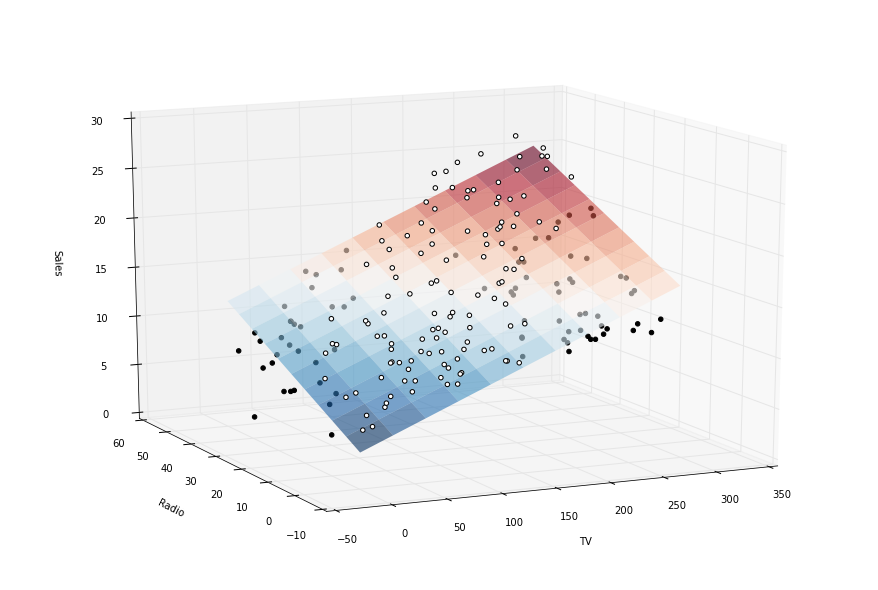

In [49]:
# TODO add image and put this code into an appendix at the bottom
from mpl_toolkits.mplot3d import Axes3D


## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))

# plot the hyperplane by evaluating the parameters on the grid
Z = lm.intercept_ + (lm.coef_[0] * xx1) + (lm.coef_[1] * xx2)

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - lm.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

In [50]:
# load the boston housing dataset - median house values in the Boston area
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [77]:
feature_cols = ['crim', 'lstat']
X = df[feature_cols]
y = df.medv

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
for coef, feature in zip(lm.coef_, feature_cols):
    print '{}\t{:.3f}'.format(feature, coef)
    
    
print lm.score(X, y)

crim	-0.070
lstat	-0.911
0.547586244394


adding features to the model will always increase the score output

In [79]:
feature_cols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
X = df[feature_cols]
y = df.medv

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
for coef, feature in zip(lm.coef_, feature_cols):
    print '{}\t{:.3f}'.format(feature, coef)
    
    
print lm.score(X, y)

crim	-0.108
zn	0.046
indus	0.021
chas	2.687
nox	-17.767
rm	3.810
age	0.001
dis	-1.476
rad	0.306
tax	-0.012
ptratio	-0.953
black	0.009
lstat	-0.525
0.740642664109


In [ ]:
Therefore is necessary to apply r2_normalized score

In [76]:
from sklearn.metrics import r2_score
r2_score(lm.predict(X), y)  

0.64982123166985062